# Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [6]:
df = pd.read_csv('drive/MyDrive/personality-with-label.csv')
df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0,2
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0,2
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,4
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,3
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0,1


In [7]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711963 entries, 0 to 711962
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    711963 non-null  float64
 1   EXT3    711963 non-null  float64
 2   EXT5    711963 non-null  float64
 3   EXT7    711963 non-null  float64
 4   EXT9    711963 non-null  float64
 5   EST1    711963 non-null  float64
 6   EST3    711963 non-null  float64
 7   EST6    711963 non-null  float64
 8   EST7    711963 non-null  float64
 9   EST10   711963 non-null  float64
 10  AGR4    711963 non-null  float64
 11  AGR6    711963 non-null  float64
 12  AGR8    711963 non-null  float64
 13  AGR9    711963 non-null  float64
 14  AGR10   711963 non-null  float64
 15  CSN1    711963 non-null  float64
 16  CSN5    711963 non-null  float64
 17  CSN7    711963 non-null  float64
 18  CSN9    711963 non-null  float64
 19  CSN10   711963 non-null  float64
 20  OPN1    711963 non-null  float64
 21  OPN5    71

In [8]:
# statistical measures about the data
df.describe()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
count,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,...,711963.000000,711963.000000,711963.000000,711963.00000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000
mean,2.675364,3.357805,3.352702,2.823718,2.993576,3.306509,3.886288,2.842194,3.030153,2.768274,...,2.719799,3.800422,3.333387,3.72597,3.744856,3.857605,3.252411,4.340848,4.019911,2.005940
std,1.222582,1.139285,1.192673,1.351908,1.291578,1.288392,1.090061,1.263299,1.236890,1.268118,...,1.220807,1.011567,1.182091,0.89193,1.056115,0.881973,1.184793,0.704847,0.935402,1.302729
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.00000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [9]:
# checking the distribution of Target Varibale
df['labels'].value_counts()

2    181651
1    153575
3    150742
4    114763
0    111232
Name: labels, dtype: int64

In [10]:
df.groupby('labels').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
labels,,,,,,,,,,,,,,,,,,,,,
0,3.648123,4.477857,4.409082,4.071256,3.911006,2.173421,3.018529,1.829105,2.095206,1.644509,...,3.875333,3.213266,3.921569,3.662076,4.046695,4.037822,4.347319,3.393007,4.321544,4.469802
1,2.122780,2.695282,2.806179,2.129298,2.407586,4.303194,4.640723,3.801765,3.846557,3.712759,...,3.381306,2.514550,3.865655,3.311099,3.647508,3.609780,3.594081,3.172040,4.503689,3.851070
2,2.674943,3.428498,3.303593,2.771650,3.090030,2.532169,3.244089,2.171466,2.468662,2.218413,...,3.482667,2.662006,3.631513,3.152270,3.619088,3.764180,3.877766,3.262470,4.145813,3.964646
3,3.251821,3.926205,4.058637,3.540520,3.443174,3.820594,4.402595,3.247827,3.399258,2.873990,...,3.703341,2.970008,4.016406,3.695340,3.979508,3.815997,4.107575,3.315871,4.514787,4.285269
4,1.715483,2.300306,2.210660,1.684724,2.145317,3.621376,4.056090,3.068872,3.247754,3.325044,...,3.143086,2.279001,3.579368,2.855886,3.356265,3.517632,3.375356,3.124413,4.221883,3.548731


# Classification

Klasifikasi adalah proses pengelompokkan data baru berdasarkan kedekatan dengan data yang sudah ada dan memiliki label. Dalam  hal ini datanya adalah hasil test big five personality dan labelnya adalah cluster (5 type of personality).

Metode yang digunakan untuk klasifikasi ini adalah DNN. Neural network models can be configured to support multi-class classification and can perform well, depending on the specifics of the classification task

In [11]:
# Memisahkan fitur dan label
X = df.drop('labels', axis=1)
y = df['labels']

In [12]:
from sklearn.model_selection import train_test_split
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur-fitur pada set pelatihan dan pengujian
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Membangun arsitektur Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # Jumlah output sesuai dengan jumlah klaster kepribadian
])

In [15]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Akurasi:", accuracy)

4450/4450 [==============================] - 12s 2ms/step - loss: 1.7315 - accuracy: 0.1736
Loss: 1.731503963470459
Akurasi: 0.17358297109603882


In [17]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=160, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3560/3560 [==============================] - 22s 5ms/step - loss: 0.1098 - accuracy: 0.9580 - val_loss: 0.0469 - val_accuracy: 0.9814
Epoch 2/100
3560/3560 [==============================] - 12s 3ms/step - loss: 0.0398 - accuracy: 0.9837 - val_loss: 0.0336 - val_accuracy: 0.9864
Epoch 3/100
3560/3560 [==============================] - 12s 3ms/step - loss: 0.0325 - accuracy: 0.9867 - val_loss: 0.0287 - val_accuracy: 0.9881
Epoch 4/100
3560/3560 [==============================] - 12s 3ms/step - loss: 0.0297 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9831
Epoch 5/100
3560/3560 [==============================] - 15s 4ms/step - loss: 0.0275 - accuracy: 0.9884 - val_loss: 0.0315 - val_accuracy: 0.9868
Epoch 6/100
3560/3560 [==============================] - 13s 4ms/step - loss: 0.0264 - accuracy: 0.9888 - val_loss: 0.0243 - val_accuracy: 0.9900
Epoch 7/100
3560/3560 [==============================] - 12s 3ms/step - loss: 0.0253 - accuracy: 0.9895 - val_loss: 0.0251 -

In [18]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

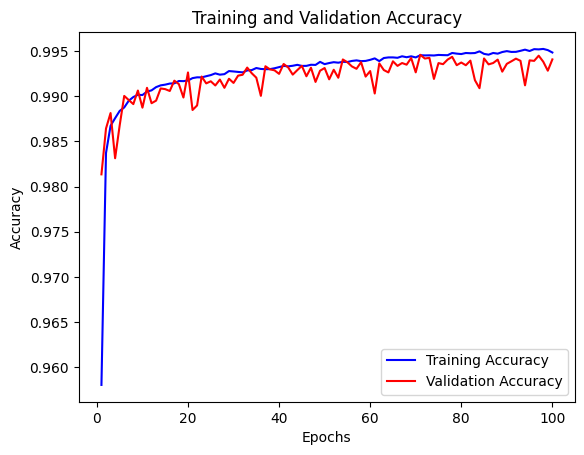

In [19]:
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()